K Means Clustering - based on distance formula

In [0]:
#import numpy and pandas
import pandas as pd 
import numpy as np

**Loading a dataset university in excel file**

which combine the colleges on factors given.

In [0]:
colg = pd.read_excel('university.xlsx')

In [0]:
colg.head()

,University,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Harvard University,1310,89,22,13,22704,94
1,California Institute of Technology,1415,100,25,6,63575,81
2,Massachusetts Institute of Technology,1260,62,59,9,25026,72
3,Stanford University,1310,76,24,12,31510,88
4,Princeton University,1280,83,33,13,21864,90


In [0]:
colg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
University    100 non-null object
SAT           100 non-null int64
Top10         100 non-null int64
Accept        100 non-null int64
SFRatio       100 non-null int64
Expenses      100 non-null int64
GradRate      100 non-null int64
dtypes: int64(6), object(1)
memory usage: 5.5+ KB


In [0]:
colg.shape

(100, 7)

In [0]:
#checking for any null values
colg.isnull().sum()

University    0
SAT           0
Top10         0
Accept        0
SFRatio       0
Expenses      0
GradRate      0
dtype: int64

In [0]:
X = colg.iloc[:,1:]

In [0]:
X.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


**Preprocessing**

In [0]:
from sklearn.preprocessing import scale

In [0]:
X = scale(X)

In [0]:
X

array([[ 6.32860277e-01,  1.50011672e+00, -8.47758804e-01,
        -1.06559813e+00, -1.49953373e+00,  1.21638361e+00],
       [ 2.80231274e+00,  3.69443640e+00, -3.36033168e-01,
        -2.18224287e+00,  1.29812886e+00, -1.28171859e+00],
       [-4.00212326e-01, -3.88594066e+00,  5.46352405e+00,
        -1.70368084e+00, -1.34059041e+00, -3.01117396e+00],
       [ 6.32860277e-01, -1.09317017e+00, -5.06608380e-01,
        -1.22511881e+00, -8.96753843e-01,  6.34133635e-02],
       [ 1.30167148e-02,  3.03215082e-01,  1.02856853e+00,
        -1.06559813e+00, -1.55703261e+00,  4.47736779e-01],
       [ 1.45931836e+00, -4.94719345e-01, -8.47758804e-01,
         1.64625339e+00, -1.56606814e+00, -3.20910052e-01],
       [ 2.49239096e+00,  5.02698689e-01, -3.36033168e-01,
         5.29608650e-01,  4.98073064e-01,  8.32060194e-01],
       [ 1.25270384e+00, -6.94202952e-01, -3.36033168e-01,
        -1.08474061e-01, -1.22169095e+00, -8.97395175e-01],
       [-1.24733186e+00, -8.93686559e-01, -1.530

**Applying the Algorithm KMeans**

In [0]:
from sklearn.cluster import KMeans

In [0]:
#giving the no. of clusters in which to combine randomly
model = KMeans(n_clusters = 3,random_state = 5)

In [0]:
#fitting the model x
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [0]:
model.labels_

array([0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1,
       2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0])

In [0]:
#we cluster according to model.labels_
colg['Cluster'] = model.labels_ 

In [0]:
colg.head()

,University,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Harvard University,1310,89,22,13,22704,94,0
1,California Institute of Technology,1415,100,25,6,63575,81,1
2,Massachusetts Institute of Technology,1260,62,59,9,25026,72,1
3,Stanford University,1310,76,24,12,31510,88,0
4,Princeton University,1280,83,33,13,21864,90,0


In [0]:
#grouping them and finding there mean
colg.groupby('Cluster').mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1303.368421,82.973684,26.473684,21.710526,33121.210526,86.868421
1,1278.741935,81.677419,29.774194,13.580645,50466.806452,83.806452
2,1250.580645,79.451613,24.774194,23.290323,52838.354839,92.516129


In [0]:
#import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

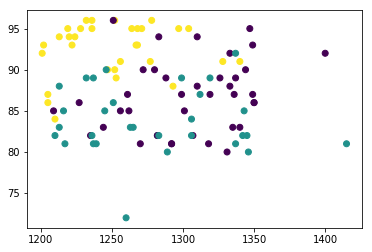

In [0]:
#using scatter plot to see the clustering
plt.scatter(colg.SAT,colg.GradRate,c = model.labels_)